In [1105]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import sklearn
import statsmodels as sm
import statsmodels.api as sm
import statsmodels.stats.api as sms
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score


In [1000]:
master = pd.read_csv('day.csv')

In [1001]:
master.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600



	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [1002]:
master.shape

print("There are {0} columns and {1} rows in this dataset.".format(master.shape[0],master.shape[1]))

There are 730 columns and 16 rows in this dataset.


In [1003]:
master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


- We can see that dteday is an object datatype and it needs to be converted to datatime.
- The categorical variables have integer values and they need to be converted to object datatype.

In [1004]:
master['dteday'] = master.dteday.astype('datetime64')

In [1005]:
master['season'] = master['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})

master['weathersit'] = master['weathersit'].map({1:'Clear', 2:'Mist',3:'Light Rain',4:'Heavy Rain'})

master['mnth'] = master['mnth'].map({1:'Jan', 2:'Feb',3:'Mar',4:'Apr', 5:'May', 6:'Jun',7:'Jul',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'})
                             
master['weekday'] = master['weekday'].map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5 : 'Fri',6:'Sat'})





In [1006]:
master.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,Jan,0,Mon,1,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,0,Jan,0,Tue,1,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Data Visualisation

### 1) Univariate Analysis:  Numerical Columns 

In [1007]:
num_cols = master[['temp', 'atemp','hum','windspeed','casual','registered','cnt']]
x = num_cols.columns

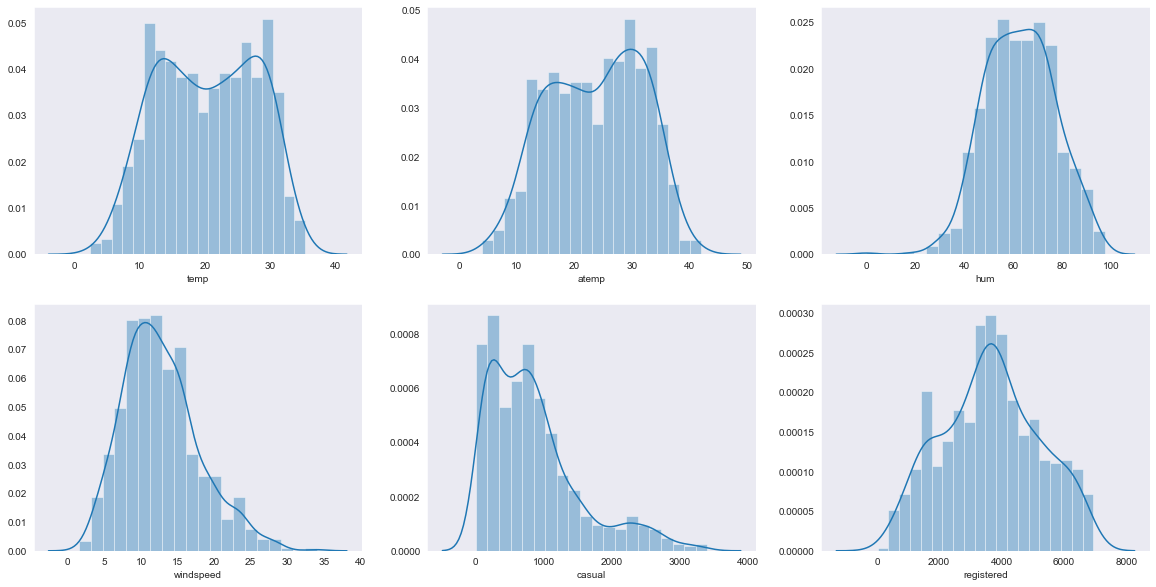

In [1008]:
plt.figure(figsize=[20,10])
sns.set_style('dark')


plt.subplot(2,3,1)
sns.distplot(master.temp, bins = 20)

plt.subplot(2,3,2)
sns.distplot(master.atemp, bins = 20)

plt.subplot(2,3,3)
sns.distplot(master.hum, bins = 20)

plt.subplot(2,3,4)
sns.distplot(master.windspeed, bins = 20)

plt.subplot(2,3,5)
sns.distplot(master.casual, bins = 20)

plt.subplot(2,3,6)
sns.distplot(master.registered, bins = 20)


plt.show()

Inferences:
    - temp and atemp are both bimodal.
    - humidity, windspeed and registered show an almost normally distributed curve
    - casual seems to be slighly skewed towards the right.

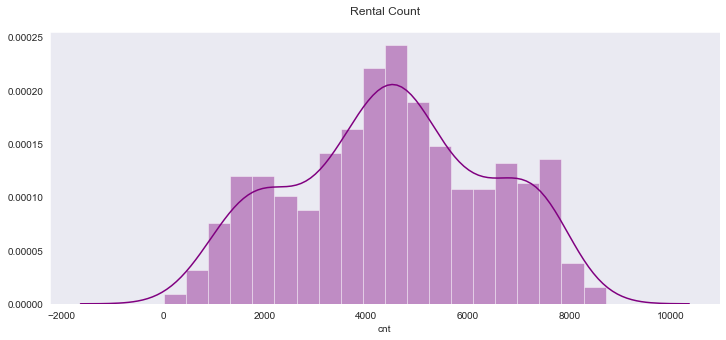

In [1009]:
plt.figure(figsize=[12,5])

plt.title('Rental Count\n', fontdict={'fontsize': 12 , 'color': '992211'})
sns.set_style('dark')
sns.distplot(master.cnt, bins =20, color = 'purple')
plt.show()


- The average count is somewhere between 4000-5000 and the curve is normally distributed.

### 2) Univariate Analysis: Categorical Variable

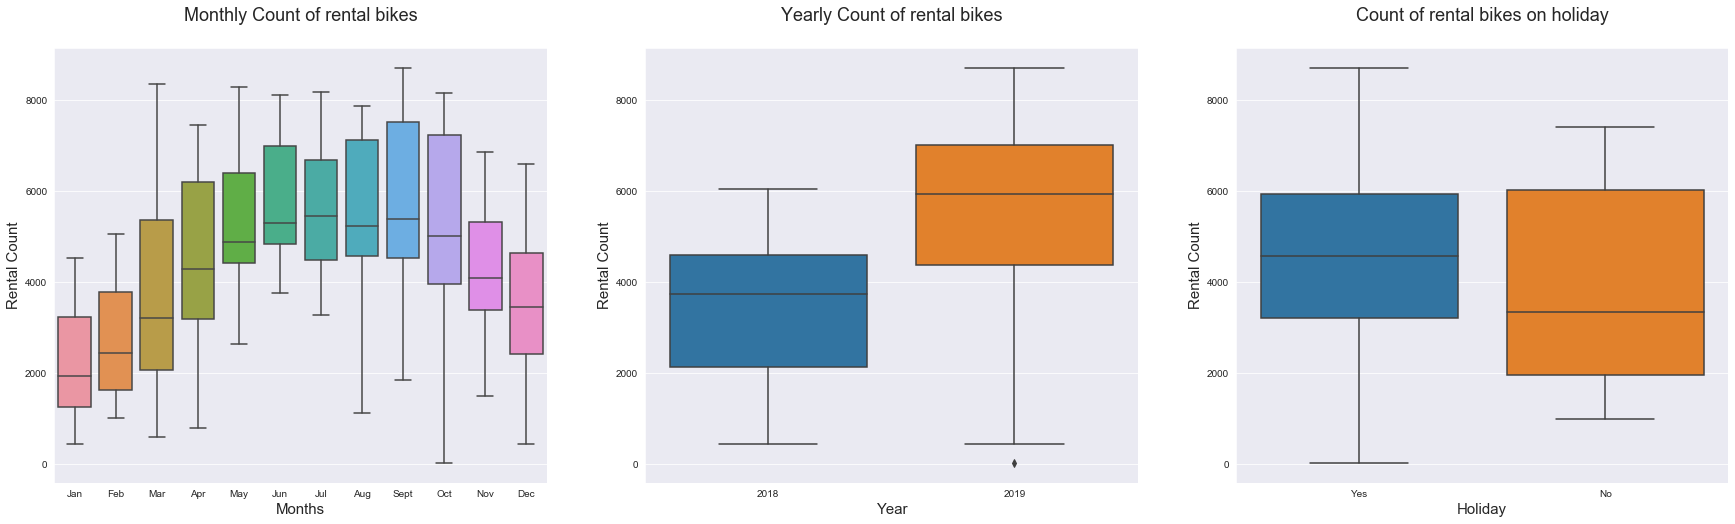

In [1010]:
plt.figure(figsize=[30,8])
sns.set_style('darkgrid')


plt.subplot(1,3,1)
plt.title('Monthly Count of rental bikes\n',  fontdict={'fontsize':18})
sns.boxplot(master.mnth,master.cnt)
plt.xlabel('Months', fontdict={'fontsize':15})
plt.ylabel('Rental Count', fontdict={'fontsize':15})


plt.subplot(1,3,2)
plt.title('Yearly Count of rental bikes\n',  fontdict={'fontsize':18})
sns.boxplot(master.yr,master.cnt)
ticks = [0,1]
plt.xticks(ticks = ticks, labels = ['2018','2019'])
plt.xlabel('Year', fontdict={'fontsize':15})
plt.ylabel('Rental Count', fontdict={'fontsize':15})


plt.subplot(1,3,3)
plt.title('Count of rental bikes on holiday\n',  fontdict={'fontsize':18})
sns.boxplot(master.holiday,master.cnt)
plt.xlabel('Holiday', fontdict={'fontsize':15})
plt.ylabel('Rental Count', fontdict={'fontsize':15})
ticks = [0,1]
plt.xticks(ticks = ticks, labels = ['Yes','No'])




plt.show()

Inference
- We can see that the rental count is maximum in the months of August,September and October. Rental count is minimum in the month of January and February.
- There has been an increase in the rental count from the year 2018 to 2019.
- Rental count is slighly more on holidays.

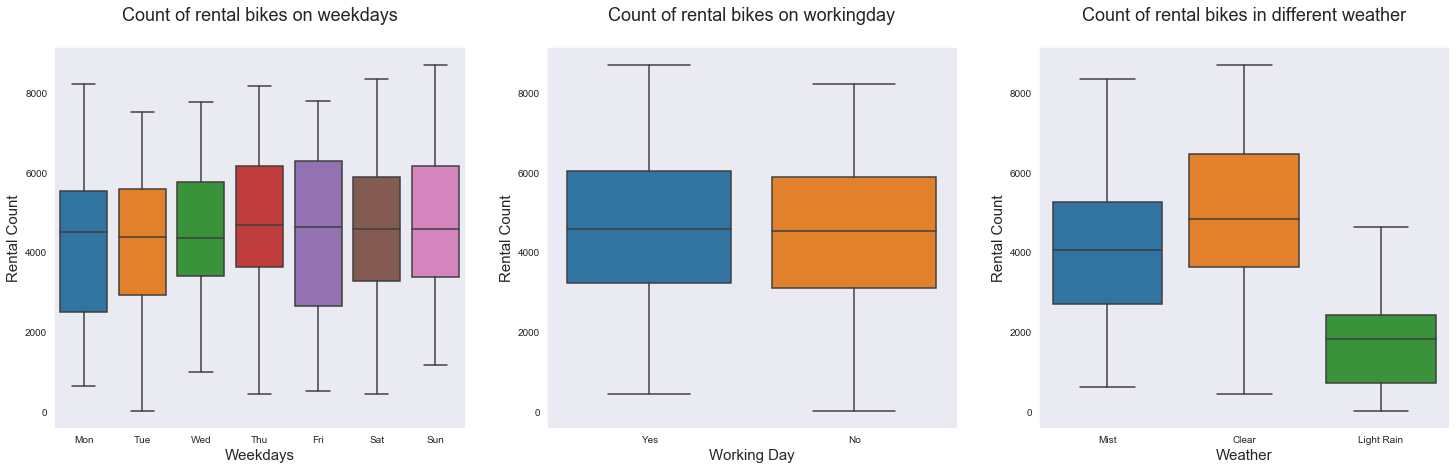

In [1011]:
plt.figure(figsize=[25,7])
sns.set_style('dark')

plt.subplot(1,3,1)
plt.title('Count of rental bikes on weekdays\n',  fontdict={'fontsize':18})
sns.boxplot(master.weekday,master.cnt)
plt.xlabel('Weekdays',fontdict={'fontsize':15})
plt.ylabel('Rental Count', fontdict={'fontsize':15})

plt.subplot(1,3,2)
plt.title('Count of rental bikes on workingday\n',  fontdict={'fontsize':18})
sns.boxplot(master.workingday,master.cnt)
ticks = [0,1]
plt.xticks(ticks = ticks, labels = ['Yes','No'])
plt.xlabel('Working Day',fontdict={'fontsize':15})
plt.ylabel('Rental Count', fontdict={'fontsize':15})


plt.subplot(1,3,3)
plt.title('Count of rental bikes in different weather\n',  fontdict={'fontsize':18})
sns.boxplot(master.weathersit, master.cnt)
plt.xlabel('Weather',fontdict={'fontsize':15})
plt.ylabel('Rental Count', fontdict={'fontsize':15})

plt.show()

Inferences: 
    - There is not any significant difference in rental count across any day in a week.The maximum rental count is found on Sunday.

    - Again, there is not a significant difference in the rental count between working day/non working day. Rental count on working day is slighly more than on holidays/weekends.
    - We can see that rental count is maximum on a clear day, followed by misty day and the least on day when there is rain.

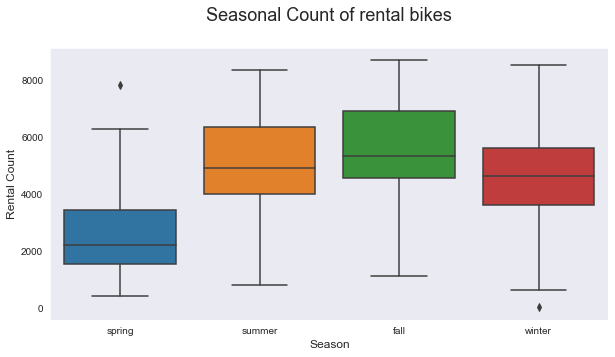

In [1012]:
plt.figure(figsize=[10,5])
plt.title('Seasonal Count of rental bikes\n',  fontdict={'fontsize':18})
sns.boxplot(master.season,master.cnt)
plt.xlabel('Season',fontdict={'fontsize':12})
plt.ylabel('Rental Count', fontdict={'fontsize':12})
plt.show()


Inference:
    -Rental count was maximum in fall, winter and summer season.
    -Rental count was minimum in spring season

In [1013]:
master[(master.season == 'spring') & (master.cnt > 7000)]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
440,441,2019-03-17,spring,1,Mar,0,Sun,0,Mist,21.080847,25.2523,75.5833,7.417168,3155,4681,7836


- The demand has been low throughout the spring season. The one outlier from that season was on the date March 17th 2019. Surpringly, March 17th was St. Patricks Day which is celebrated in US. On festivals such as this, the company should maintain inventory for customers.

### 3) Bivariate Analysis (Casual and Registered Users)

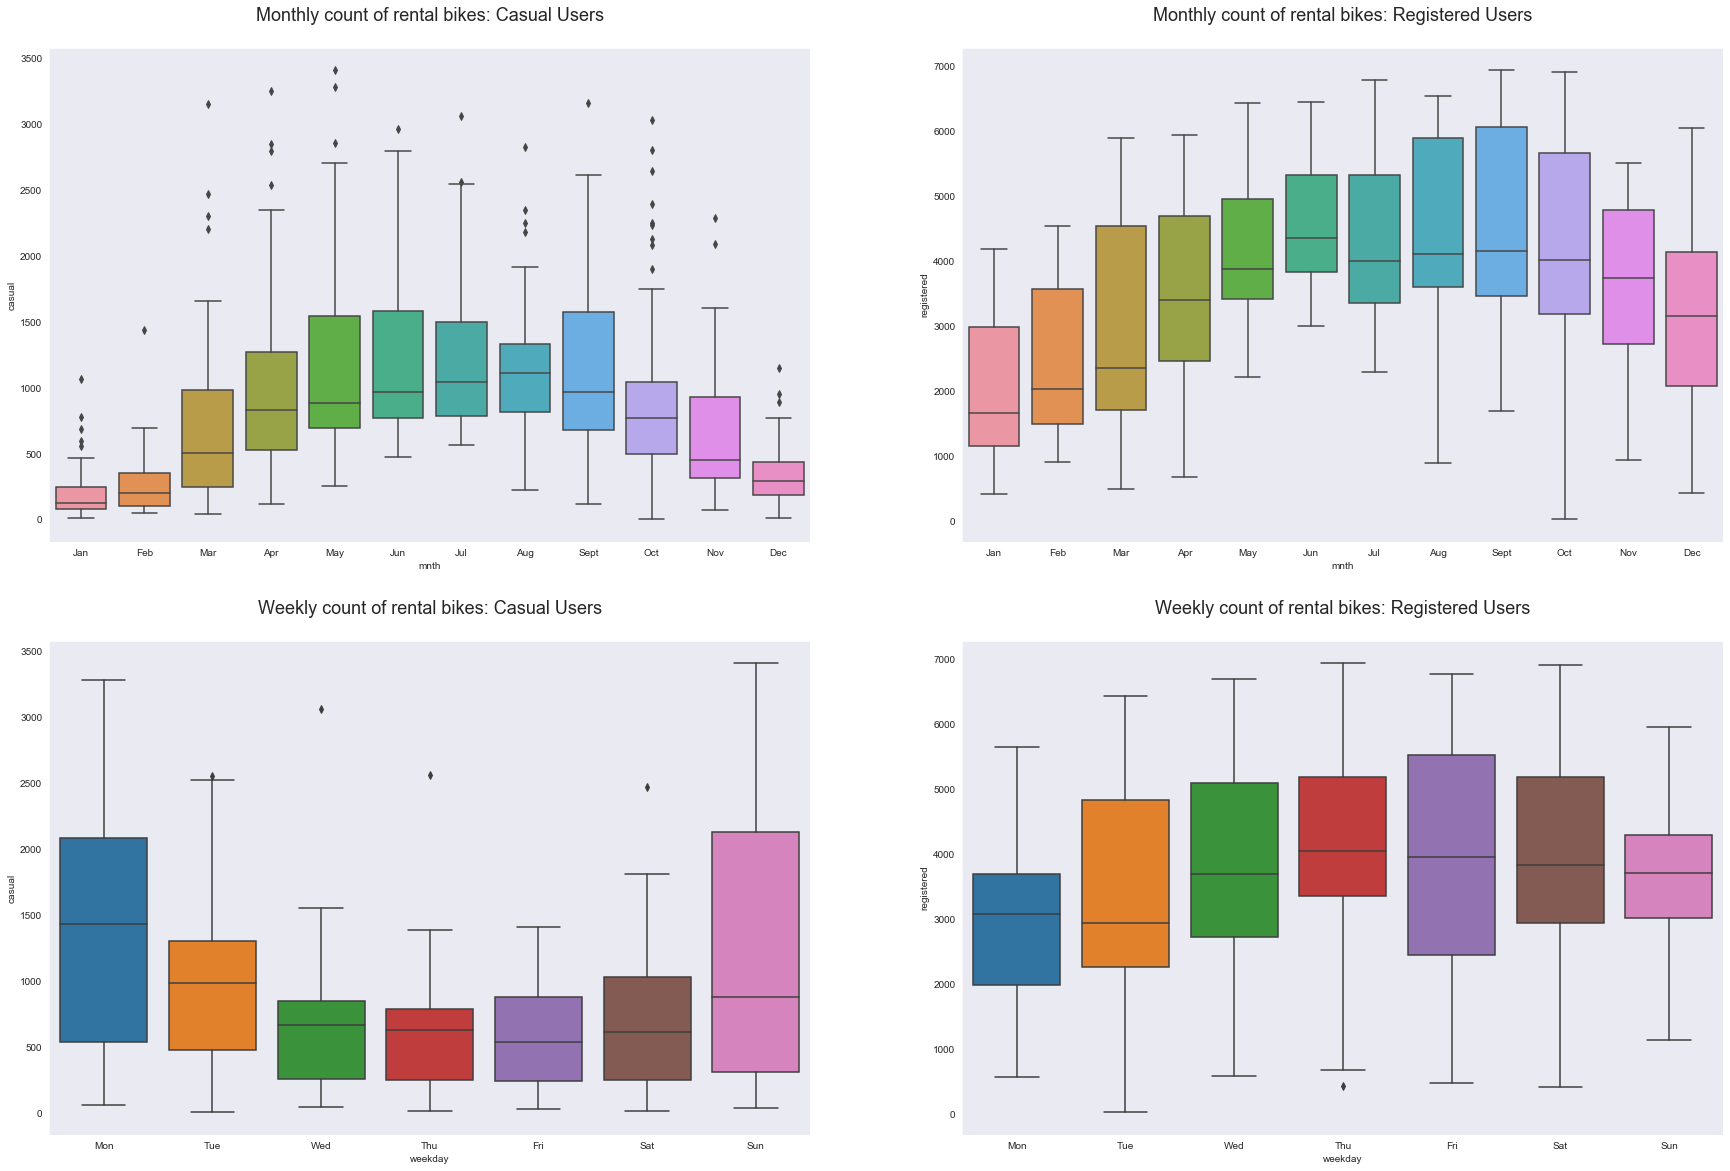

In [1014]:
plt.figure(figsize=[30,20])
plt.subplot(2,2,1)
plt.title('Monthly count of rental bikes: Casual Users\n',  fontdict={'fontsize':18})
sns.boxplot(master.mnth,master.casual)

plt.subplot(2,2,2)
plt.title('Monthly count of rental bikes: Registered Users\n',  fontdict={'fontsize':18})
sns.boxplot(master.mnth,master.registered)

plt.subplot(2,2,3)
plt.title('Weekly count of rental bikes: Casual Users\n',  fontdict={'fontsize':18})
sns.boxplot(master.weekday,master.casual)

plt.subplot(2,2,4)
plt.title('Weekly count of rental bikes: Registered Users\n',  fontdict={'fontsize':18})
sns.boxplot(master.weekday,master.registered)

plt.show()


Inferences:
    - In the case Monthly bike-rental count of casual usrs, rental count is more scattered and we see outliers too.However, for registered users the rental count was consistent.
    - In the case of Monthly bike- rental count of registered users, maximum rental counts are in the months of Aug-Sept-Oct and there aren't any outliers
    - In the case of Weekly bik-rental count of casual users, users typically rent most on Sunday and Monday.
    - In the case of Weekly bike-rental count in registered users, users rent least on sunday and Monday and maximum on Thu-Fri-Sat.

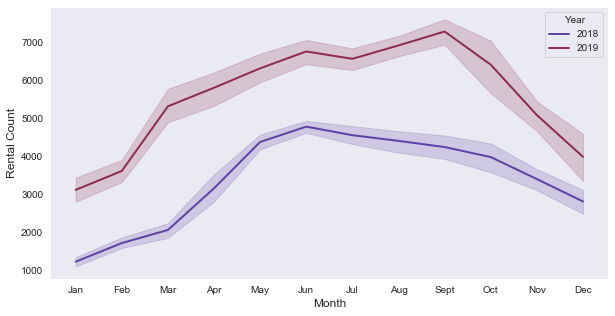

In [1015]:
plt.figure(figsize=[10,5])
sns.lineplot(
    data=master,
    x="mnth", y="cnt", hue="yr",
     linewidth=2, zorder=4,
       legend='brief',palette='twilight', sort = False
    )
plt.xlabel('Month', fontdict={'fontsize':12})
plt.ylabel('Rental Count',fontdict={'fontsize':12})
plt.legend(title='Year', loc='upper right', labels=['2018', '2019'])

plt.show()

Inference:
    - We see that the rental count has increased substantially from 2018 to 2019.
    - The peak of rental count is seen to be in the month of September 2019.
    - There is a steep fall in the demand of bikes towards the end of year 2019.

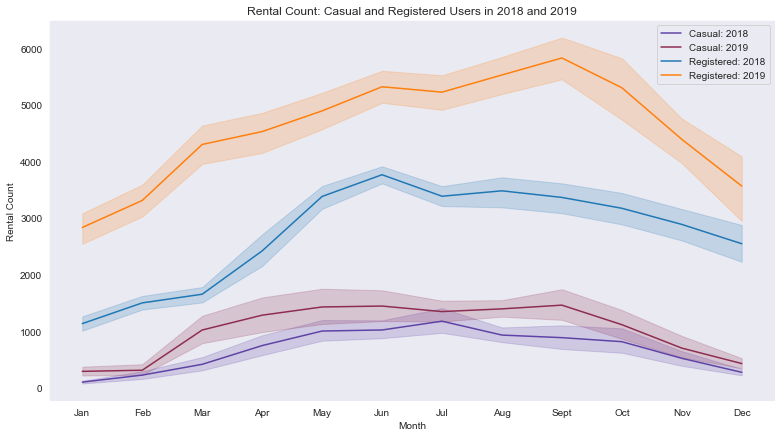

In [1016]:
plt.figure(figsize=[13,7])
sns.lineplot(data=master, x = "mnth" , y ='casual',hue = 'yr', palette='twilight', legend = False, sort= False)

registered_year = sns.lineplot(data=master, x = "mnth" , y ='registered',hue = 'yr', legend = False, sort =False)
plt.legend(labels = ['Casual: 2018','Casual: 2019','Registered: 2018','Registered: 2019'])
plt.xlabel('Month')
plt.ylabel('Rental Count')
plt.title('Rental Count: Casual and Registered Users in 2018 and 2019')


plt.show()


Inferences : 
    - The rental count in registered users increased substantially in year 2019 whereas there is not a very large jump in the rental count of casual users.

### 4) Multivariate Analysis

(11, 0)

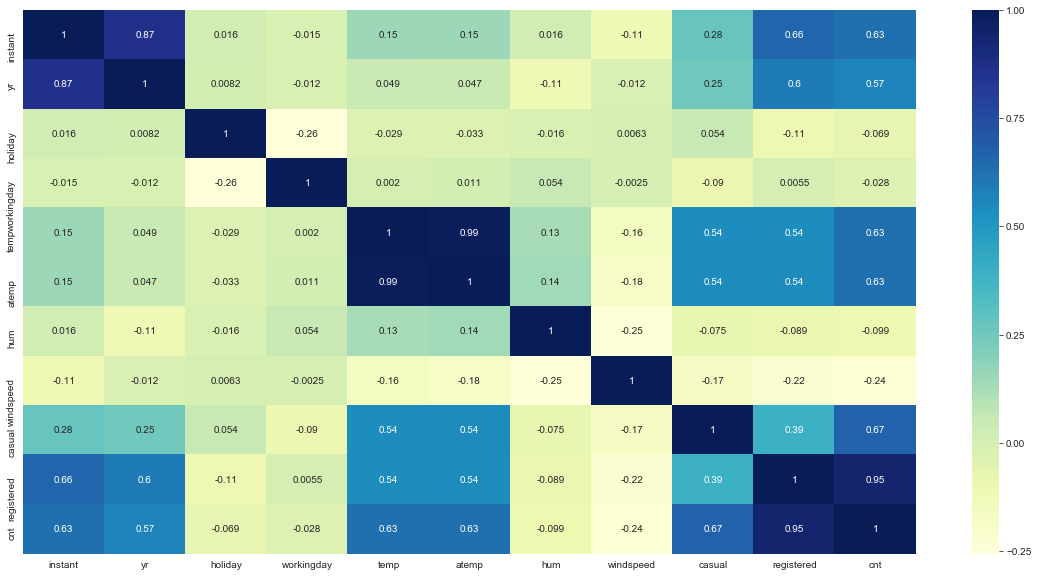

In [1017]:
plt.figure(figsize=[20,10])
heatmap = sns.heatmap(master.corr(), annot=True, cmap='YlGnBu')
heatmap.set_ylim(11,0)

Inferences:
    - There is high correlation between temp and atemp which suggests collinearity. So we will have to delete one of those.
    - Registered and Casual users are subset of the target variable and thus they have high correlation with count. And we will need to delete it.
    - We will also delete instant column as it does not offer any useful information about the target variable.

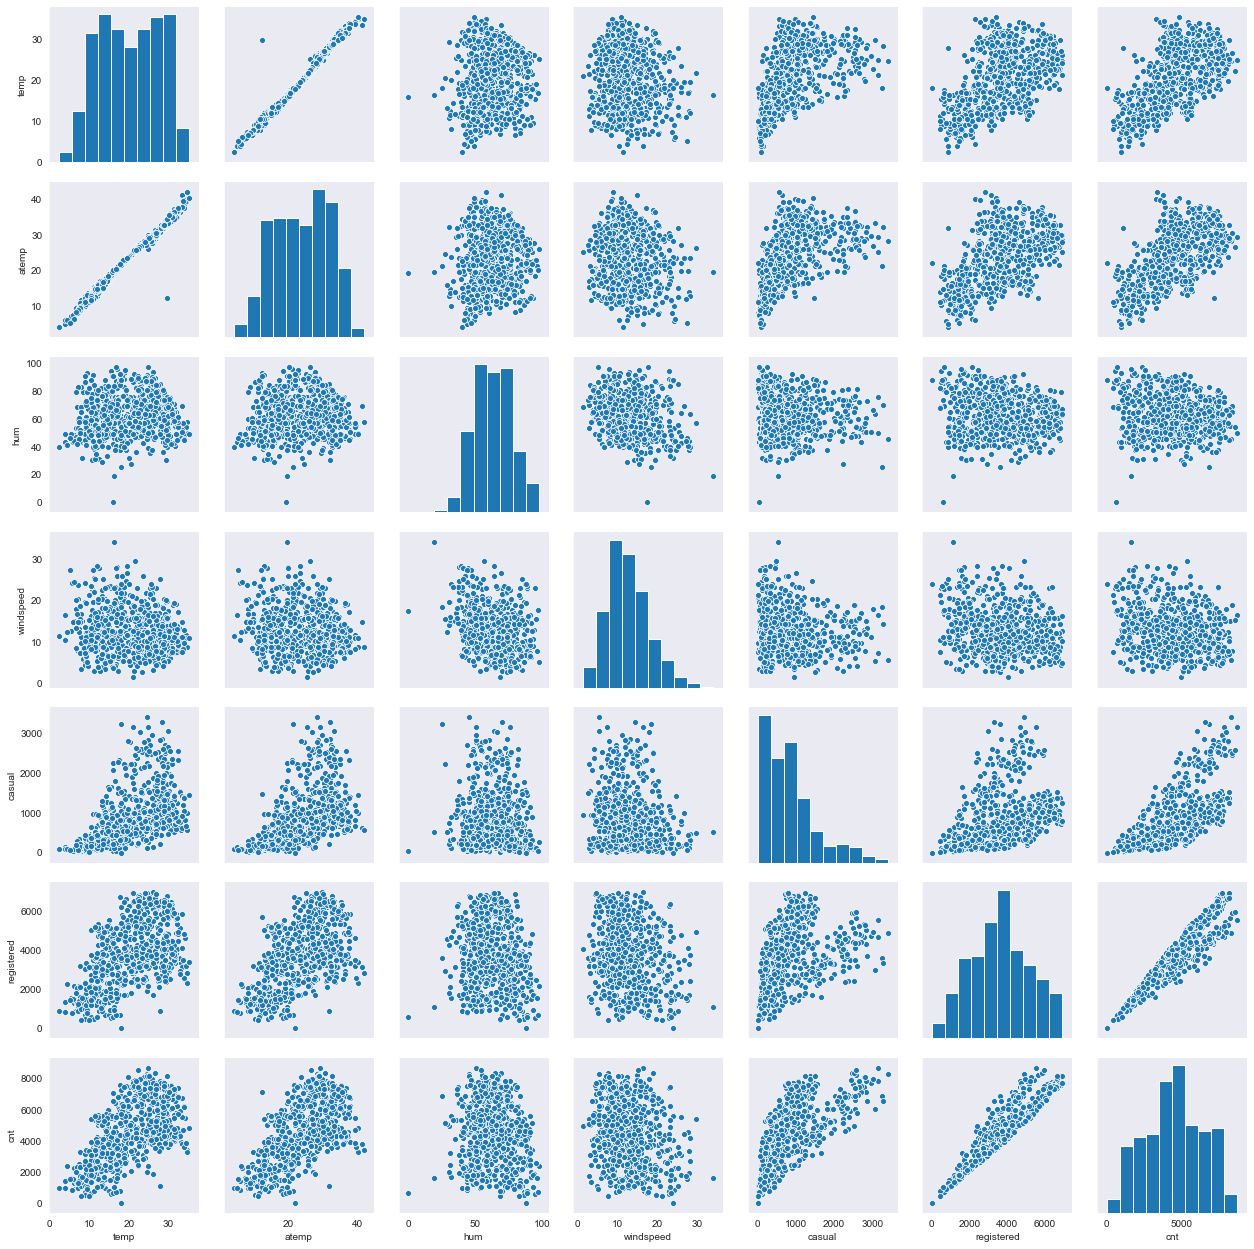

In [1018]:
sns.pairplot(num_cols)
plt.show()

- We observe a strong correlation in between temp- atemp, and also between registered-cnt.

## Preparing the data for modeling(train-test-split, rescaling, etc.)

- Encoding : Convert categorical to dummy variables
- Splitting into train and test
- Rescaling the features

#### Encoding

In [1025]:
season = pd.get_dummies(master.season, drop_first=True)

weather = pd.get_dummies(master.weathersit, drop_first=True)

month = pd.get_dummies(master.mnth, drop_first=True)

week_day = pd.get_dummies(master.weekday, drop_first=True)



In [1026]:
master = pd.concat([master,season, weather,month,week_day], axis=1 )

In [1027]:
master.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter,Light Rain,Mist,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sept,Mon,Sat,Sun,Thu,Tue,Wed
0,1,2018-01-01,spring,0,Jan,0,Mon,1,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2,2018-02-01,spring,0,Jan,0,Tue,1,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,3,2018-03-01,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,4,2018-04-01,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,5,2018-05-01,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1028]:
master.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'spring', 'summer', 'winter',
       'Light Rain', 'Mist', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar',
       'May', 'Nov', 'Oct', 'Sept', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed'],
      dtype='object')

In [1029]:
master.drop(['season','mnth','weekday','weathersit','instant','dteday','casual','registered','atemp'], axis=1,inplace= True)


#### Splitting the data

In [1031]:
df_train,df_test = train_test_split(master,train_size = 0.7,random_state = 100)

In [1032]:
df_train.shape

(510, 29)

In [1033]:
df_test.shape

(220, 29)

In [1034]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Light Rain,Mist,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sept,Mon,Sat,Sun,Thu,Tue,Wed
576,1,0,1,29.246653,70.4167,11.083475,7216,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
426,1,0,0,16.980847,62.1250,10.792293,4066,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
728,1,0,1,10.489153,48.3333,23.500518,1796,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,4220,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
111,0,0,0,13.803347,72.9583,14.707907,1683,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


#### Rescaling

In [1035]:
scaler = MinMaxScaler()

In [1036]:
pd.set_option('display.max_columns', None)

In [1037]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Light Rain,Mist,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sept,Mon,Sat,Sun,Thu,Tue,Wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,20.108257,63.123710,12.834912,4485.337255,0.243137,0.247059,0.247059,0.029412,0.345098,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294
std,0.500429,0.157763,0.453386,7.431626,14.153170,5.292031,1950.666077,0.429398,0.431725,0.431725,0.169124,0.475867,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373
min,0.000000,0.000000,0.000000,2.424346,0.000000,2.834381,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.606865,52.270825,9.041918,3120.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.277923,63.437500,12.083182,4530.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.615847,73.250025,15.750879,5973.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,97.041700,34.000021,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1038]:
num_vars = ['temp','hum','windspeed','cnt']

In [1039]:
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])


In [1040]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Light Rain,Mist,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sept,Mon,Sat,Sun,Thu,Tue,Wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,0.029412,0.345098,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294
std,0.500429,0.157763,0.453386,0.225858,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,0.169124,0.475867,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- All the variables are now rescaled with minimum value as 0 and max as 1

## Training the model

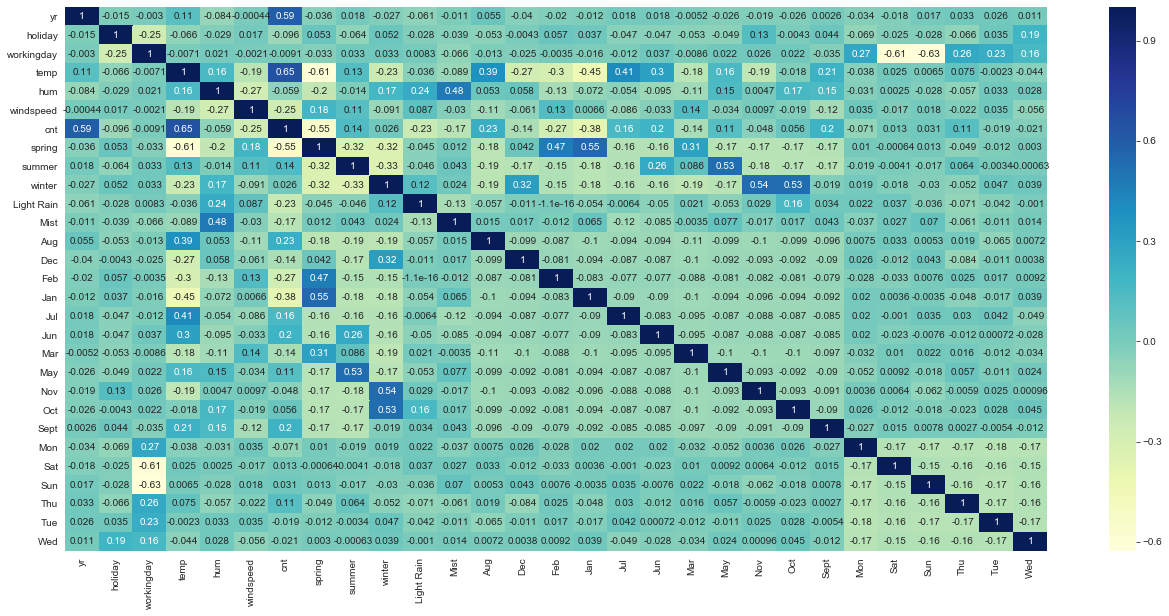

In [1044]:
plt.figure(figsize=[22,10])
heatmap2 = sns.heatmap(df_train.corr(),annot=True, cmap='YlGnBu')
heatmap2.set_ylim([29,0])
plt.show()


In [1045]:
y_train = df_train.pop('cnt')

In [1046]:
X_train = df_train

In [1047]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Light Rain,Mist,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sept,Mon,Sat,Sun,Thu,Tue,Wed
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
728,1,0,1,0.245101,0.498067,0.663106,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
111,0,0,0,0.345824,0.751824,0.380981,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [1048]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

### Building the model

In [1049]:
# We will be using a mixed approach here. We will start with 15 variables and follow a mixed approach for model building
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train, y_train)

In [1050]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Light Rain', True, 1),
 ('Mist', True, 1),
 ('Aug', False, 9),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 11),
 ('Mar', False, 14),
 ('May', False, 8),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sept', True, 1),
 ('Mon', False, 7),
 ('Sat', False, 4),
 ('Sun', False, 5),
 ('Thu', False, 13),
 ('Tue', False, 6),
 ('Wed', False, 10)]

In [1051]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'Light Rain', 'Mist', 'Dec', 'Jan', 'Jul', 'Nov', 'Sept'],
      dtype='object')

In [1053]:
X_train.columns[~rfe.support_]
## columns not included 

Index(['workingday', 'Aug', 'Feb', 'Jun', 'Mar', 'May', 'Oct', 'Mon', 'Sat',
       'Sun', 'Thu', 'Tue', 'Wed'],
      dtype='object')

In [1054]:
X_train_rfe = X_train[col]

In [1055]:
X_train_rfe1 = sm.add_constant(X_train_rfe)

In [1056]:
lm1 = sm.OLS(y_train,X_train_rfe1).fit() 

In [1059]:
#Let's see the summary of our linear model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          8.15e-189
Time:                        20:51:24   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3197      0.036      8.859      0.0

### VIF

In [1058]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,30.89
2,temp,17.79
4,windspeed,4.72
5,spring,4.37
7,winter,4.06
6,summer,2.82
9,Mist,2.32
0,yr,2.09
13,Nov,1.85
11,Jan,1.75


In [1060]:
# Hum has High VIF so we are going to drop it.
X_train_rfe=X_train_rfe.drop(['hum'],axis=1)

In [1061]:
X_train_rfe2 = sm.add_constant(X_train_rfe)
lm2 = sm.OLS(y_train,X_train_rfe2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          4.75e-186
Time:                        20:57:37   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2450      0.032      7.618      0.0

In [1062]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,winter,2.95
4,spring,2.89
5,summer,2.24
0,yr,2.07
12,Nov,1.81
10,Jan,1.66
11,Jul,1.59
8,Mist,1.57


In [1063]:
## We are first going to delete the column Nov, and see if VIF in temp goes down.
X_train_rfe=X_train_rfe.drop(['Nov'],axis=1)

In [1064]:
X_train_rfe3 = sm.add_constant(X_train_rfe)
lm3 = sm.OLS(y_train,X_train_rfe3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.0
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          2.74e-186
Time:                        20:58:02   Log-Likelihood:                 502.67
No. Observations:                 510   AIC:                            -977.3
Df Residuals:                     496   BIC:                            -918.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2283      0.031      7.310      0.0

In [1065]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.14
3,windspeed,4.62
4,spring,2.89
5,summer,2.24
0,yr,2.07
6,winter,2.05
10,Jan,1.65
11,Jul,1.59
8,Mist,1.57
12,Sept,1.34


In [1066]:
## VIF in temp reduced slighly, we will delete Dec as it has a high p-value 
X_train_rfe=X_train_rfe.drop(['Dec'],axis=1)

In [1067]:
X_train_rfe4 = sm.add_constant(X_train_rfe)
lm4 = sm.OLS(y_train,X_train_rfe4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          8.14e-187
Time:                        20:58:14   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2154      0.030      7.088      0.0

In [1068]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.13
3,windspeed,4.62
4,spring,2.75
5,summer,2.24
0,yr,2.07
6,winter,1.78
9,Jan,1.61
10,Jul,1.59
8,Mist,1.56
11,Sept,1.34


In [1069]:
# Again, VIF of temp reduced slightly, we will finally delete the column Jan as it has a negligible coeffcient
X_train_rfe=X_train_rfe.drop(['Jan'],axis=1)

In [1070]:
X_train_rfe5 = sm.add_constant(X_train_rfe)
lm5 = sm.OLS(y_train,X_train_rfe5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          5.06e-187
Time:                        20:58:26   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1994      0.030      6.746      0.0

In [1071]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.09
3,windspeed,4.60
5,summer,2.23
4,spring,2.08
0,yr,2.07
6,winter,1.78
9,Jul,1.58
8,Mist,1.55
10,Sept,1.34
7,Light Rain,1.08


- We will delete July as we see it has a small coefficient which tells that it does not have a major effect on the target variable

In [1072]:
X_train_rfe=X_train_rfe.drop(['Jul'],axis=1)

In [1073]:
X_train_rfe6 = sm.add_constant(X_train_rfe)
lm6 = sm.OLS(y_train,X_train_rfe6).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          1.47e-186
Time:                        20:58:37   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1909      0.030      6.447      0.0

In [1074]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.60
2,temp,3.84
0,yr,2.07
4,spring,1.99
5,summer,1.90
6,winter,1.63
8,Mist,1.55
9,Sept,1.23
7,Light Rain,1.08
1,holiday,1.04


Inferences:
- We have reached our desired model where all the variables are significant and have VIF less than 5.
- I chose to not delete temp as it had a greater significance than the variables deleted and we could bring the VIF of temp down to 3.84 from the initial 5.17. 

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [1075]:
y_train_cnt = lm6.predict(X_train_rfe6)


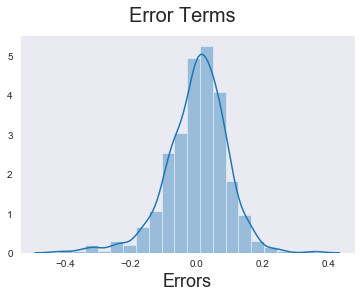

In [1077]:
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                
plt.xlabel('Errors', fontsize = 18)  
plt.show()

- We can clearly see that it follows a normal distribution and it is centered around 0.

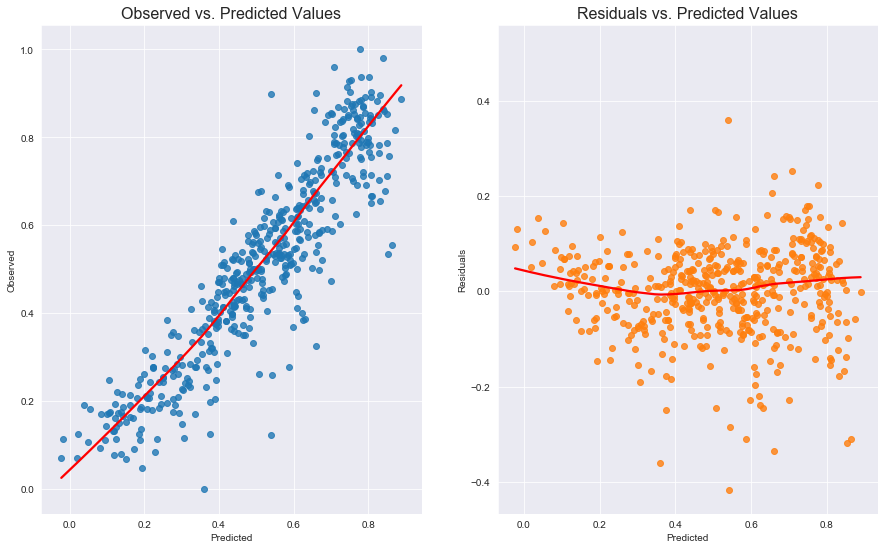

<Figure size 1440x720 with 0 Axes>

In [1128]:

sns.set_style('darkgrid')

sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def linearity_test(model, y):


   '''

   Args:

   * model - fitted OLS model from statsmodels

   * y - observed values

   '''

   fitted_vals = model.predict()

   resids = model.resid



   fig, ax = plt.subplots(1,2)

   

   sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})

   ax[0].set_title('Observed vs. Predicted Values', fontsize=16)

   ax[0].set(xlabel='Predicted', ylabel='Observed')



   sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})

   ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)

   ax[1].set(xlabel='Predicted', ylabel='Residuals')
   plt.figure(figsize=[20,10])
   plt.show()


   

linearity_test(lm6, y_train)    





In [1122]:
lm6.resid.mean()

-2.0918996382618515e-15

-A linear relationship is assumed between the target variable(y) and the predictors. However, fitting a linear model to data with non-linear patters can lead to major prediction errors.
To ascertain non-linearity, one can look at the plots of observed vs predicted values or residuals vs predicted values. In the first plot, the desired outcome is a symmetric distribution around a diagonal line and in the second plot, a symmetric distribution around a horizontal line. Also, the variance should roughly be constant.
- We see that the linearity assumption is satisfied. and the mean of the residual is zero.


## Making predictions

### Applying scaling on test set

In [1078]:
num_vars = ['temp','hum','windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

### Splitting into X_test and y_test

In [1079]:
y_test = df_test.pop('cnt')
X_test = df_test

In [1080]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [1081]:
# Predicting on the test set
y_pred = lm6.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

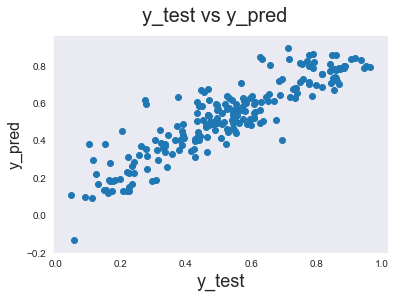

In [970]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)                          

-Calculating R Square and Adjusted R Square of the test to check the model accuracy

In [1102]:
r2 = r2_score(y_true= y_test,y_pred = y_pred)
r2

0.8038195990728842

In [1103]:
n = X_test_new.shape[0]
p = X_test_new.shape[1]

adjusted_r2 = 1-(1- r2)*(n-1)/(n-p-1)
adjusted_r2

0.7934446740238541

- Train r2 = 0.833
- Train Adj r2 = 0.829
- Test r2 = 0.80
- Test Adj r2 = 0.793

#### This seems to be a good model


In [1104]:
lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Mon, 28 Dec 2020   Prob (F-statistic):          1.47e-186
Time:                        21:13:01   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1909      0.030      6.447      0.000       0.133       0.249
yr             0.2341      0.008     28.237      0.000       0.218       0.250
holiday       -0.0963      0.026     -3.668      0.000      -0.148      -0.045
temp           0.4777      0.033     14.423      0.000       0.413       0.543
windspeed     -0.1481      0.025     -5.854      0.000      -0.198      -0.098
spring        -0.0554      0.021     -2.654      0.008      -0.096      -0.014
summer         0.0621      0.014      4.350      0.000       0.034       0.090
winter         0.0945      0.017      5.630      0.000       0.062       0.127
Light Rain    -0.2850      0.025    -11.444      0.000      -0.334      -0.236
Mist          -0.0787      0.009     -8.938      0.000      -0.096      -0.061
Sept           0.0910      0.016      5.566      0.000       0.059       0.123
==============================================================================
Omnibus:                       63.413   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.384
Skew:                          -0.674   Prob(JB):                     1.21e-31
Kurtosis:                       5.210   Cond. No.                         17.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Report

-The three main determinants of rental count of bikes are: 
    1. temp: a unit increase in temp will increase the rental count by 0.4777
    2. Light Rain: a unit increase in light rain will cause the rental count to go down by (-0.2850)
    3. windspeed: a unit increase in windspeed will cause the rental count to go down by (-0.1481)
        
     - While building a model, one needs to prioritize these three. For example: during the summer months when the   demand for rental bikes is likely to increase, the company should maintain inventory to cater to the customers. On days when there is rain and the windspeed is high, the company can come up with offers to increase the demand.
     
-The other variables which need to be considered are:
        - yr: This suggests that with a unit increase in yr will increase the rental count by 0.2341. It basically suggests that demand is expected to grow each year. Also, we saw in the data visualisation the registered users base took a leap in the year 2019. So, after COVID gets over, they should bring offers to get more people to register.
        - holiday, spring and mist will cause the rental count to go down: Again, the company can come up with offers to gain customer base.
        - sept, winter,summer will cause the rental count to go up.
        